## Interpretação do modelo

[Source]('https://github.com/Jcharis/Python-Machine-Learning/blob/master/Interpreting%20Machine%20Learning%20Models%20in%20Python/Interpreting%20ML%20Models%20with%20LIME%20and%20Eli5.ipynb')

Análise. Apresentar (i) resultados de interpretação global do modelo (i.e., as características mais importantes de cada classe), (ii) exemplos de interpretação local, e (iii) uma análise de erros com suas considerações sobre o resultado. Para os itens (i) e (ii), use a biblioteca eli5 ou similar com um classificador simples (como reglog baseado em palavras). Para o item (iii), selecione manualmente alguns casos de instâncias incorretamente classificadas (tantas quanto achar necessário) e faça considerações sobre o porquê do erro.   


### Modelos SVM e RF

In [1]:
import pandas as pd
import numpy as np

import pickle
from sklearn.ensemble import VotingClassifier

from scipy.sparse import load_npz
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
df = pd.read_csv('../data/enc_tok_nopunct_lemm.csv', )
df.head()

,req_text,age,age_encoded,word_tokens,lemma
0,quantos empregados em cada um dos atuais níve...,a2,1,"['quantos', 'empregados', 'em', 'cada', 'um', ...",quanto empregado em cada um de o atual nível s...
1,solicito cópia das atas do conselho de admini...,a2,1,"['solicito', 'cópia', 'das', 'atas', 'do', 'co...",solicito cópia de o ata de o conselho de admin...
2,solicito informar a norma lei decreto portari...,a2,1,"['solicito', 'informar', 'a', 'norma', 'lei', ...",solicito informar o norma lei decreto portaria...
3,solicito por gentileza a informação sobre a q...,a2,1,"['solicito', 'por', 'gentileza', 'a', 'informa...",solicito por gentileza o informação sobre o qu...
4,solicito por gentileza a informação sobre a q...,a2,1,"['solicito', 'por', 'gentileza', 'a', 'informa...",solicito por gentileza o informação sobre o qu...


In [17]:
X = df['lemma']
y = df['age_encoded']

In [3]:
X_train = load_npz('../vectors/tfidf_lemma/X_train_tfidf.npz')
y_train = np.load('../vectors/tfidf_lemma/y_train.npy')

X_test = load_npz('../vectors/tfidf_lemma/X_test_tfidf.npz')
y_test = np.load('../vectors/tfidf_lemma/y_test.npy')

labels = ['0','1','2','3']
labels_names = ['a1','a2','a3','a4']

In [4]:
with open('../models_dump/SVM_CV50_T50.pkl', 'rb') as file:
    SVM = pickle.load(file)

with open('../models_dump/RF_CV51_T51.pkl', 'rb') as file:
    RF = pickle.load(file)

/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/chocomenta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when usin

### Words

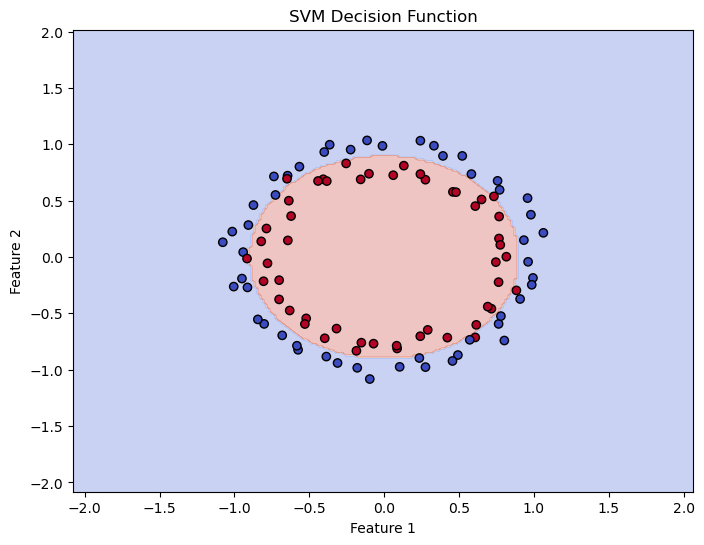

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Gerar dados de exemplo com dois círculos
X_train, y_train = make_circles(n_samples=100, noise=0.05, random_state=42)

# Treinar um SVM não linear (kernel='rbf' para um kernel radial)
svm_model = SVM
svm_model.fit(X_train, y_train)

# Função para visualizar o SVM no espaço original
def plot_decision_function(X, y, model, ax):
    h = .02  # Passo do mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title("SVM Decision Function")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Visualizar o resultado
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_function(X_train, y_train, svm_model, ax)
plt.show()


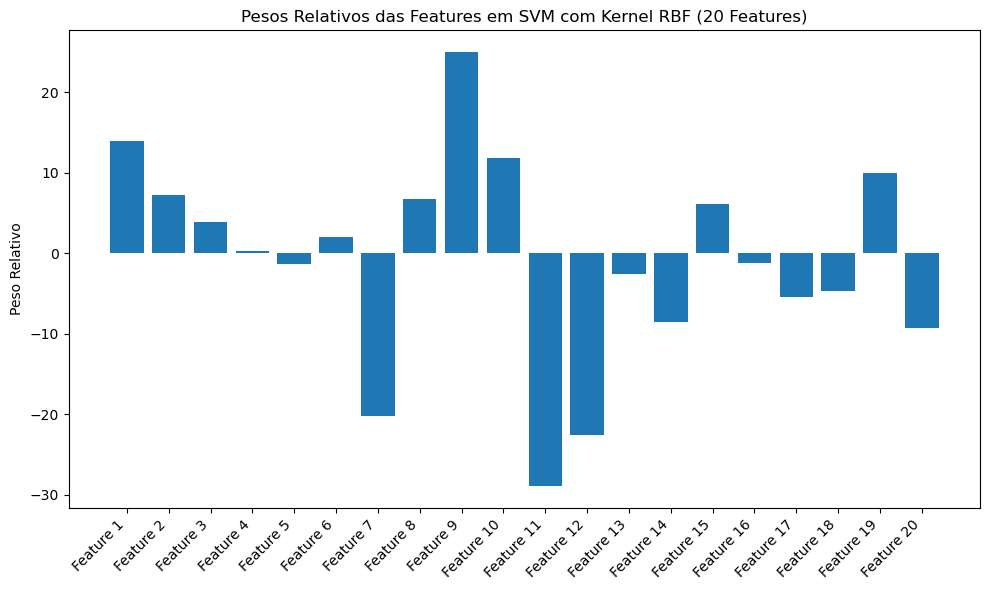

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Gerar dados de exemplo com 20 features
X, y = make_classification(n_samples=100, n_features=20, n_informative=10, random_state=42)

# Dividir os dados em conjuntos de treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um SVM não linear com kernel RBF
svm_model = SVC(kernel='rbf', C=1)
svm_model.fit(X_train, y_train)

# Calcular a distância dos vetores de suporte até o hiperplano de decisão
distancias_vetores_suporte = svm_model.decision_function(X_train)

# Calcular o peso relativo das features
pesos_features = np.sum((svm_model.support_vectors_ * svm_model.dual_coef_.T), axis=0)

# Visualizar os pesos relativos das features
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(X_train.shape[1]), pesos_features)
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels([f'Feature {i+1}' for i in range(X_train.shape[1])], rotation=45, ha='right')
ax.set_ylabel('Peso Relativo')
ax.set_title('Pesos Relativos das Features em SVM com Kernel RBF (20 Features)')
plt.tight_layout()
plt.show()


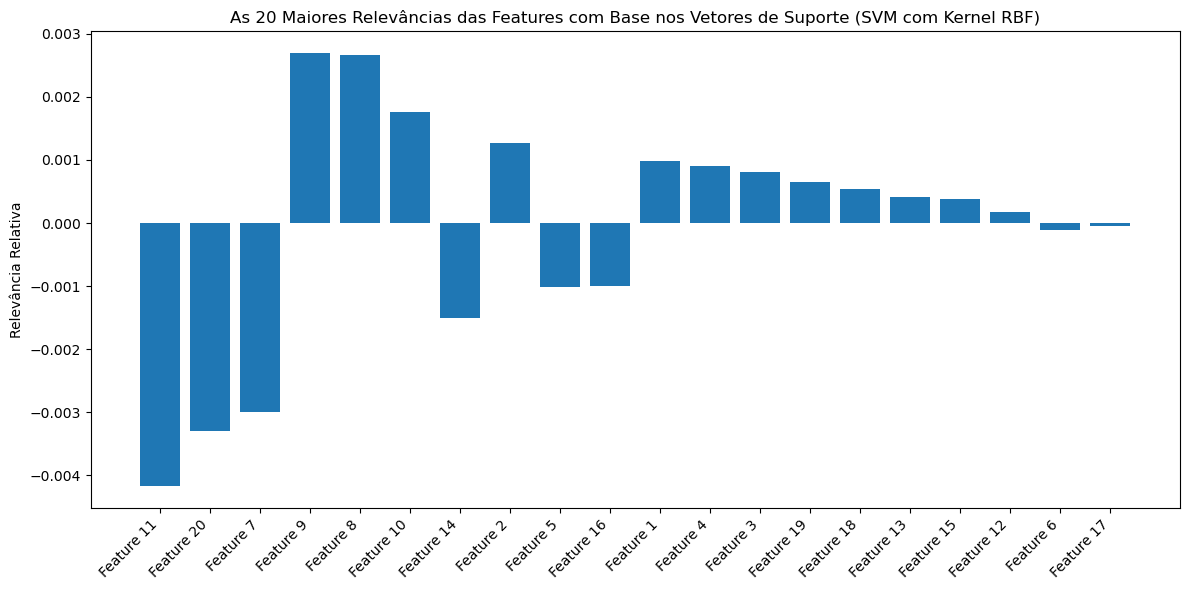

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Gerar dados de exemplo com 20 features
X, y = make_classification(n_samples=100, n_features=20, n_informative=10, random_state=42)

# Dividir os dados em conjuntos de treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um SVM não linear com kernel RBF
svm_model = SVM
svm_model.fit(X_train, y_train)

# Identificar os índices dos vetores de suporte
indices_vetores_suporte = svm_model.support_

# Obter os pesos associados aos vetores de suporte
pesos_vetores_suporte = svm_model.dual_coef_[0]

# Calcular a relevância de todas as features com base nos vetores de suporte
relevancia_features = np.sum(pesos_vetores_suporte[:, np.newaxis] * X_train[indices_vetores_suporte], axis=0)

# Identificar as 20 maiores relevâncias e seus índices
indices_top_20 = np.argsort(-np.abs(relevancia_features))[:20]
relevancias_top_20 = relevancia_features[indices_top_20]

# Visualizar as 20 maiores relevâncias
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(len(indices_top_20)), relevancias_top_20)
ax.set_xticks(range(len(indices_top_20)))
ax.set_xticklabels([f'Feature {i+1}' for i in indices_top_20], rotation=45, ha='right')
ax.set_ylabel('Relevância Relativa')
ax.set_title('As 20 Maiores Relevâncias das Features com Base nos Vetores de Suporte (SVM com Kernel RBF)')
plt.tight_layout()
plt.show()


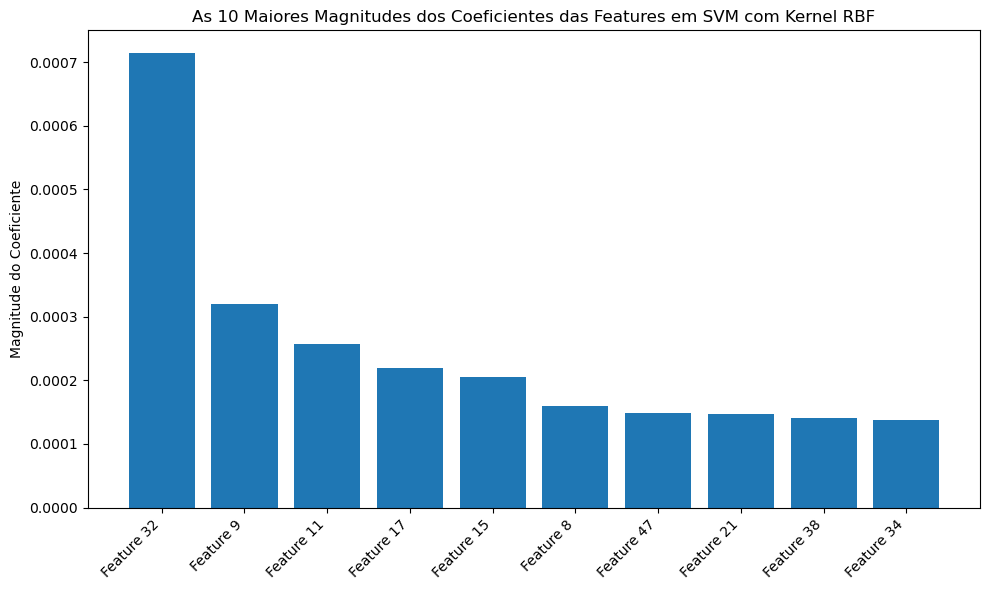

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Gerar dados de exemplo com 20 features
X, y = make_classification(n_samples=100, n_features=20, n_informative=10, random_state=42)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um SVM não linear com kernel RBF
svm_model = SVM
svm_model.fit(X_train, y_train)

# Obter os coeficientes do SVM com kernel RBF
coeficientes = np.abs(svm_model.dual_coef_)

# Identificar as 10 maiores relevâncias e seus índices
indices_top_10 = np.argsort(-coeficientes[0])[:10]
coeficientes_top_10 = coeficientes[0, indices_top_10]

# Visualizar os 10 maiores coeficientes
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(indices_top_10)), coeficientes_top_10)
ax.set_xticks(range(len(indices_top_10)))
ax.set_xticklabels([f'Feature {i+1}' for i in indices_top_10], rotation=45, ha='right')
ax.set_ylabel('Magnitude do Coeficiente')
ax.set_title('As 10 Maiores Magnitudes dos Coeficientes das Features em SVM com Kernel RBF')
plt.tight_layout()
plt.show()


In [22]:
df['lemma'][34]

'gostar de ter acesso em o íntegra a o contrato de número 4600410492 referente o locação de o sala 507 de o edifício rb1 e seu respectivo aditivo contratual se houver meu objetivo ser acessar informação como valor de locação acordar área m² locada conjunto sala ou andar objeto de o contrato prazo de contrato carência e índice de reajuste acordar e o valor de aluguel reajustar anualmente a o longo de o contrato'

In [23]:
df['lemma'][9]

'solicito por gentileza o informação sobre o quantidade de código de vaga de cargo de técnico em arquivo que estar disponívil vago em o ifce caso haver código de vaga disponível em o instituição como devo proceder para concorrer o vaga pois estar'

In [24]:
df['lemma'][11]

'solicito por gentileza o informação sobre o quantidade de código de vaga de cargo de técnico em arquivo que estar disponívil vago em o iffarr caso haver código de vaga disponível em o instituição como devo proceder para concorrer o vaga pois esto'

## RndForest

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap


# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar modelo de Random Forest
rf_model = RF
rf_model.fit(X_train, y_train)

# Criar um objeto explainer SHAP para o modelo treinado
explainer = shap.TreeExplainer(rf_model)

# Calcular os valores SHAP para uma instância específica (por exemplo, a primeira do conjunto de teste)
shap_values = explainer.shap_values(X_test[0])

# Resumir os valores SHAP para todas as instâncias de teste
shap.summary_plot(shap_values, X_test, feature_names='text'.feature_names, class_names='age'.target_names)

plt.show()


ImportError: Numba needs NumPy 1.25 or less